In [124]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data Collection

In [125]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Startup_Profit_Prediction/main/50_Startups.csv'
data = pd.read_csv(path)
original_data = data.copy()
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Preparation

#### Data Cleaning

In [126]:
data.shape

(50, 5)

This means that this dataset has 50 rows and 5 columns.

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There are no null values in the dataset and one column is categorical while others are numerical. 

In [128]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [129]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


There are no duplicate records in the dataset.

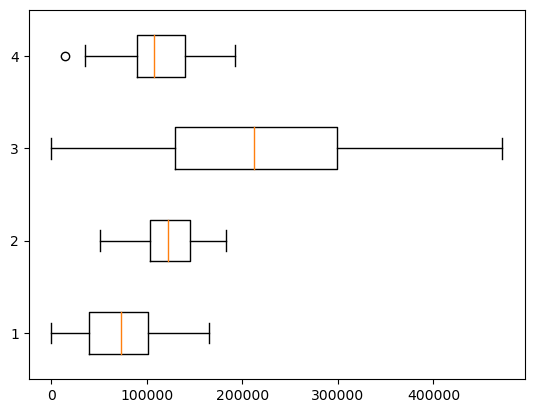

In [130]:
plt.boxplot(x = data[['R&D Spend','Administration','Marketing Spend','Profit']],vert = False)
plt.show()

In [39]:
q1 = data['Profit'].quantile(0.25)
q3 = data['Profit'].quantile(0.75)
iqr = q3 - q1
lower = q1 - (1.5*iqr)
data[data['Profit'] < lower]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


While looking at the boxplot we can see there is 1 outlier in the profit(target variable) which is present in the California State.

#### Data Analysis & Visualization

State
New York      17
California    17
Florida       16
Name: count, dtype: int64


<Axes: xlabel='State', ylabel='Profit'>

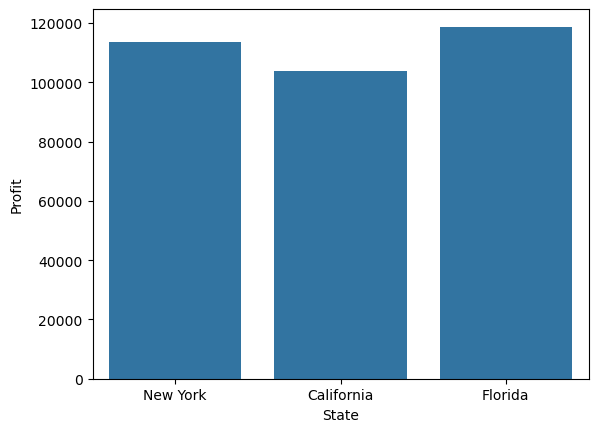

In [60]:
print(data['State'].value_counts())
sns.barplot(data = data, x = 'State', y = 'Profit', errorbar = None)

Though Florida has less startup than New York and California, still the average profit is the highest. While New York and California has same number of startups still California has less average profit as compared to New York. 

<Axes: >

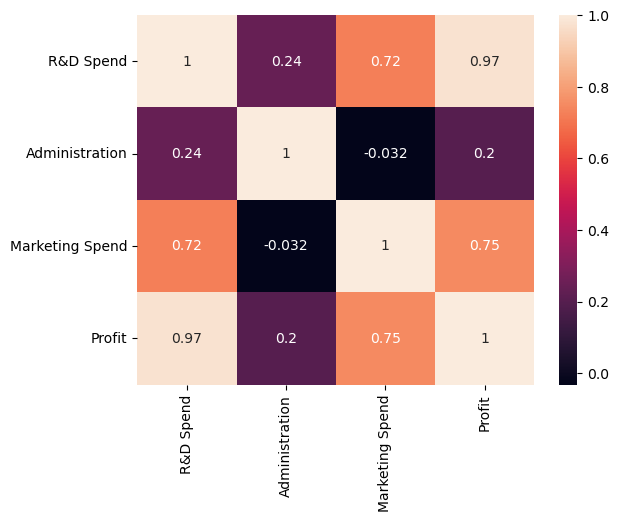

In [131]:
c = data[['R&D Spend','Administration','Marketing Spend','Profit']].corr()
sns.heatmap(data = c,annot = True)

All three columns have a direct relationship with the profit, which is our target variable with R&D Spend very highly correlated, Marketing Spend moderately correlated and Administration least correlated.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


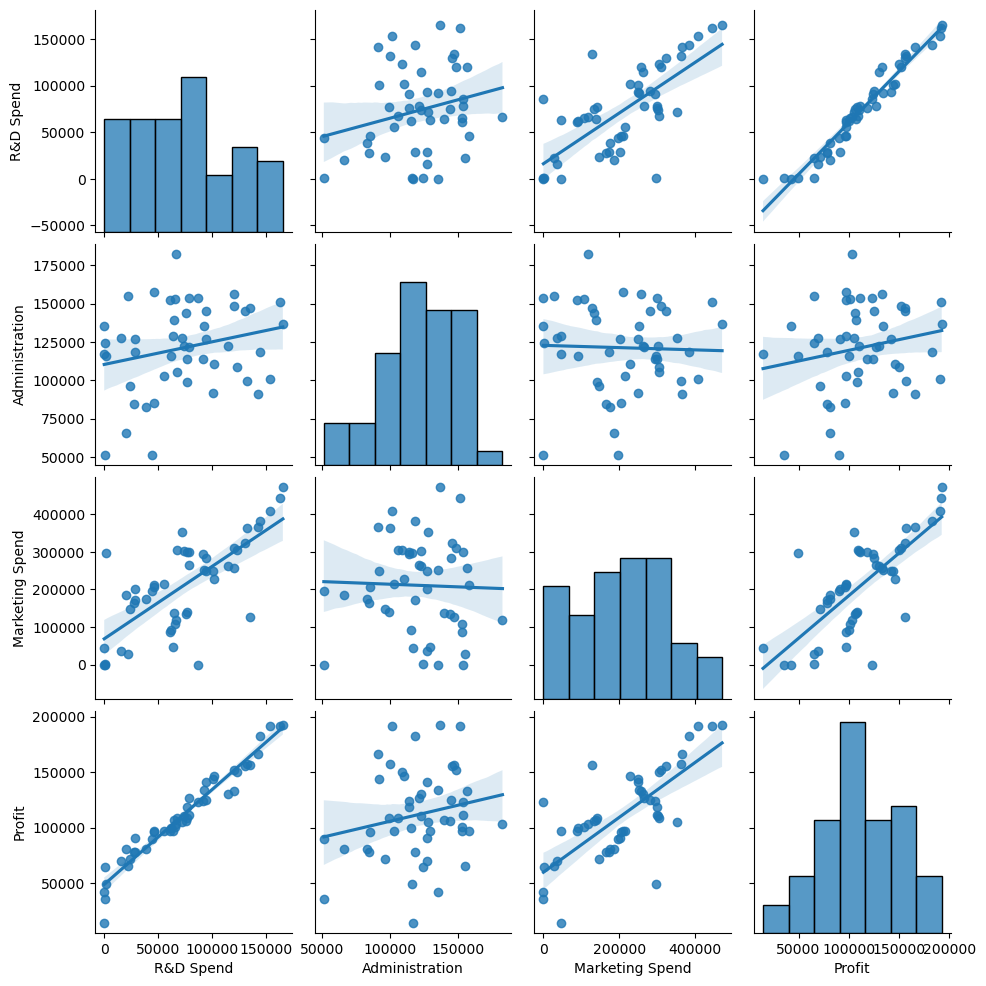

In [33]:
sns.pairplot(data,kind = 'reg')

#### Feature Engineering

In [132]:
State_num = pd.get_dummies(data = data['State'], dtype = int)
data = pd.concat([data,State_num], axis = 1).drop('State', axis = 1)

data.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


One Hot Encoding is used to convert the catgorical data into numerical values.

### Model Selection - Multiple Linear Regression

### Model building and Training

In [133]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [139]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend','California', 'Florida', 'New York']]
y = data['Profit']

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

In [145]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [146]:
y_pred_train = lr.predict(X_train) 

print('Training Accuracy is',round(r2_score(y_train,y_pred_train),2))

Training Accuracy is 0.97


In [147]:
y_pred_test = lr.predict(X_test) 

print('Testing Accuracy is',round(r2_score(y_test,y_pred_test),2))

Testing Accuracy is 0.91


The training accuracy is close to the testing accuracy which means that it is a Generalized Model.